In [23]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import seaborn as sns 
import sklearn
from scipy import stats
import scipy
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [24]:
data=pd.read_csv(r'E:\necst\Repo2\TesiBiomedica\ERP_SUB',header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
0,epochs_1-epo.fif,Animali,-0.153481,-0.111464,-0.079264,-0.066129,-0.058944,-0.033881,-0.015957,-0.021275,...,-0.146691,-0.176256,-0.222257,-0.243341,-0.271928,-0.292829,-0.310747,-0.327013,-0.356053,-0.354870
1,epochs_1-epo.fif,Uomini,0.042693,0.023528,0.014851,0.019955,0.005878,-0.007649,-0.026267,-0.035544,...,-0.237944,-0.238968,-0.237784,-0.238690,-0.234211,-0.209374,-0.198167,-0.198996,-0.183800,-0.190620
2,epochs_1-epo.fif,Cibo,0.007497,0.001623,-0.013095,-0.017285,-0.018948,-0.032000,-0.029645,-0.021884,...,-0.142786,-0.159405,-0.159476,-0.175467,-0.180311,-0.182311,-0.194797,-0.210281,-0.217522,-0.212534
3,epochs_1-epo.fif,Veicoli,0.117789,0.051544,-0.028649,-0.115674,-0.162608,-0.203637,-0.258359,-0.240916,...,-0.895473,-0.909675,-0.916709,-0.868973,-0.800742,-0.842356,-0.914385,-0.933868,-0.933164,-0.922132
4,epochs_1-epo.fif,Strumenti,0.117879,0.100995,0.103981,0.092568,0.064719,0.025329,-0.020503,-0.057118,...,-0.448931,-0.453586,-0.405005,-0.396931,-0.412871,-0.397777,-0.391134,-0.384136,-0.375224,-0.355616


In [25]:
#elimino le prime due colonne 
data.drop(data.columns[0], axis=1, inplace=True)
data.drop(data.columns[0], axis=1, inplace=True)
data.head(151)

,2,3,4,5,6,7,8,9,10,11,...,261,262,263,264,265,266,267,268,269,270
0,-0.153481,-0.111464,-0.079264,-0.066129,-0.058944,-0.033881,-0.015957,-0.021275,-0.012566,0.008653,...,-0.146691,-0.176256,-0.222257,-0.243341,-0.271928,-0.292829,-0.310747,-0.327013,-0.356053,-0.354870
1,0.042693,0.023528,0.014851,0.019955,0.005878,-0.007649,-0.026267,-0.035544,-0.043439,-0.054445,...,-0.237944,-0.238968,-0.237784,-0.238690,-0.234211,-0.209374,-0.198167,-0.198996,-0.183800,-0.190620
2,0.007497,0.001623,-0.013095,-0.017285,-0.018948,-0.032000,-0.029645,-0.021884,-0.028105,-0.028075,...,-0.142786,-0.159405,-0.159476,-0.175467,-0.180311,-0.182311,-0.194797,-0.210281,-0.217522,-0.212534
3,0.117789,0.051544,-0.028649,-0.115674,-0.162608,-0.203637,-0.258359,-0.240916,-0.301693,-0.302867,...,-0.895473,-0.909675,-0.916709,-0.868973,-0.800742,-0.842356,-0.914385,-0.933868,-0.933164,-0.922132
4,0.117879,0.100995,0.103981,0.092568,0.064719,0.025329,-0.020503,-0.057118,-0.112538,-0.121562,...,-0.448931,-0.453586,-0.405005,-0.396931,-0.412871,-0.397777,-0.391134,-0.384136,-0.375224,-0.355616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,-0.008418,0.006190,0.006701,0.019662,0.014334,-0.017195,-0.051790,-0.054099,-0.049915,-0.068264,...,0.047840,0.081313,0.117014,0.182157,0.171332,0.172358,0.184000,0.169299,0.125161,0.127165
141,0.248951,0.291668,0.207495,0.050911,-0.026684,-0.070444,-0.107960,-0.094907,-0.140259,-0.130508,...,-0.535088,-0.498780,-0.423208,-0.349608,-0.331127,-0.320761,-0.264072,-0.181770,-0.148218,-0.074978
142,-0.313778,-0.310966,-0.293918,-0.258041,-0.192522,-0.101771,-0.073781,-0.003857,0.032646,0.077952,...,0.268387,0.204055,0.124120,0.064358,0.046185,0.030586,-0.015146,0.015290,0.057344,0.062538
143,0.068434,0.123773,0.142313,0.143933,0.172430,0.161998,0.136170,0.132121,0.099045,0.047210,...,0.312314,0.325249,0.357126,0.388184,0.372604,0.385999,0.407226,0.440427,0.470531,0.496841


In [26]:
a=np.arange(60,65,1)
b=np.arange(110,120,1)
c=np.concatenate((a,b))

In [27]:
data.drop(c)

,2,3,4,5,6,7,8,9,10,11,...,261,262,263,264,265,266,267,268,269,270
0,-0.153481,-0.111464,-0.079264,-0.066129,-0.058944,-0.033881,-0.015957,-0.021275,-0.012566,0.008653,...,-0.146691,-0.176256,-0.222257,-0.243341,-0.271928,-0.292829,-0.310747,-0.327013,-0.356053,-0.354870
1,0.042693,0.023528,0.014851,0.019955,0.005878,-0.007649,-0.026267,-0.035544,-0.043439,-0.054445,...,-0.237944,-0.238968,-0.237784,-0.238690,-0.234211,-0.209374,-0.198167,-0.198996,-0.183800,-0.190620
2,0.007497,0.001623,-0.013095,-0.017285,-0.018948,-0.032000,-0.029645,-0.021884,-0.028105,-0.028075,...,-0.142786,-0.159405,-0.159476,-0.175467,-0.180311,-0.182311,-0.194797,-0.210281,-0.217522,-0.212534
3,0.117789,0.051544,-0.028649,-0.115674,-0.162608,-0.203637,-0.258359,-0.240916,-0.301693,-0.302867,...,-0.895473,-0.909675,-0.916709,-0.868973,-0.800742,-0.842356,-0.914385,-0.933868,-0.933164,-0.922132
4,0.117879,0.100995,0.103981,0.092568,0.064719,0.025329,-0.020503,-0.057118,-0.112538,-0.121562,...,-0.448931,-0.453586,-0.405005,-0.396931,-0.412871,-0.397777,-0.391134,-0.384136,-0.375224,-0.355616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,-0.008418,0.006190,0.006701,0.019662,0.014334,-0.017195,-0.051790,-0.054099,-0.049915,-0.068264,...,0.047840,0.081313,0.117014,0.182157,0.171332,0.172358,0.184000,0.169299,0.125161,0.127165
141,0.248951,0.291668,0.207495,0.050911,-0.026684,-0.070444,-0.107960,-0.094907,-0.140259,-0.130508,...,-0.535088,-0.498780,-0.423208,-0.349608,-0.331127,-0.320761,-0.264072,-0.181770,-0.148218,-0.074978
142,-0.313778,-0.310966,-0.293918,-0.258041,-0.192522,-0.101771,-0.073781,-0.003857,0.032646,0.077952,...,0.268387,0.204055,0.124120,0.064358,0.046185,0.030586,-0.015146,0.015290,0.057344,0.062538
143,0.068434,0.123773,0.142313,0.143933,0.172430,0.161998,0.136170,0.132121,0.099045,0.047210,...,0.312314,0.325249,0.357126,0.388184,0.372604,0.385999,0.407226,0.440427,0.470531,0.496841


In [28]:
#trasformo i dati in matrice numpy 
tab=np.array(data)

In [29]:
#ottengo gli indici AAAAA VANNO RICALCOLATI
Adx=np.arange(0,144,5)
Bdx=np.arange(1,144,5)
Cdx=np.arange(2,144,5)
Ddx=np.arange(3,144,5)
Edx=np.arange(4,145,5)

In [30]:
#ottengo i vettori animali e uomini
vett_animali=[tab[i]  for  i in Adx]
vett_uomini=[tab[i]  for  i in Bdx]
vett_cibo=[tab[i]  for  i in Cdx]
vett_veicoli=[tab[i]  for  i in Ddx]
vett_strumenti=[tab[i]  for  i in Edx]

In [31]:
len(vett_animali)

29

In [32]:
for i in [23,22,12]:
    vett_animali.pop(i)
    vett_uomini.pop(i)
    vett_cibo.pop(i)
    vett_veicoli.pop(i)
    vett_strumenti.pop(i)

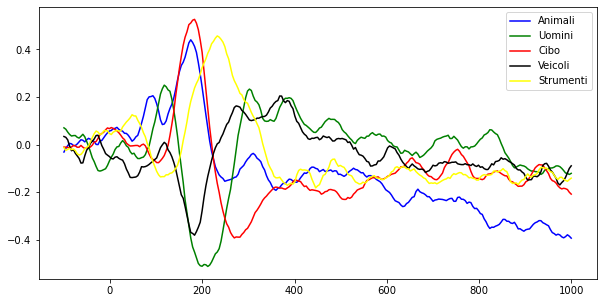

In [33]:
#Calcolo la media 
animali=0
uomini=0
cibo=0
veicoli=0
strumenti=0

for  i in range(26):
    animali=animali+vett_animali[i]
    uomini=uomini+vett_uomini[i]
    cibo=cibo+vett_cibo[i]
    veicoli=veicoli+vett_veicoli[i]
    strumenti=strumenti+vett_strumenti[i]
    
animali=animali/26
uomini=uomini/26
cibo=cibo/26
veicoli=veicoli/26
strumenti=strumenti/26


#plotto i risultati
plt.figure(figsize = (10, 5))
x=np.linspace(-100,1000,269)
plt.plot(x,animali, color='blue', label='Animali')
plt.plot(x,uomini, color='green',label='Uomini')
plt.plot(x,cibo, color='red', label='Cibo')
plt.plot(x,veicoli, color='black', label='Veicoli')
plt.plot(x,strumenti, color='yellow', label='Strumenti')

plt.legend()

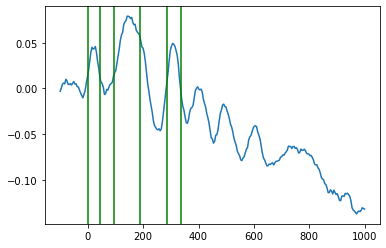

In [34]:
df=data.mean(axis=0)
sa=np.array(df)
plt.plot(x,sa,label='super avarage')
plt.axvline(x = 0, color = 'g')
plt.axvline(x = 45, color = 'g')
plt.axvline(x = 95, color = 'g')
plt.axvline(x = 190, color = 'g')
plt.axvline(x = 285, color = 'g')
plt.axvline(x = 335, color = 'g')

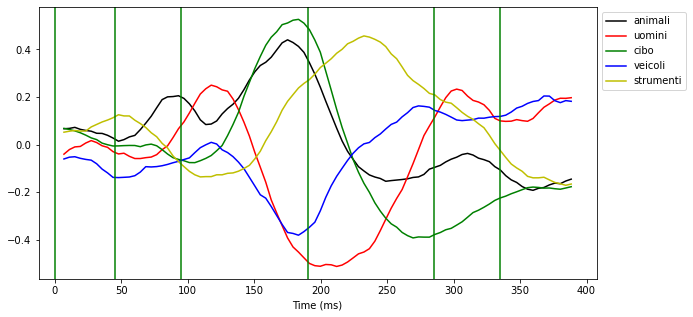

In [35]:
animali_c=np.delete(animali,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])
uomini_c=np.delete(uomini,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])
cibo_c=np.delete(cibo,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])
veicoli_c=np.delete(veicoli,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])
strumenti_c=np.delete(strumenti,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])
x_c=np.delete(x,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])

plt.figure(figsize = (10, 5))
plt.plot(x_c,animali_c,color='k', label = 'animali')
plt.plot(x_c,uomini_c,color='r',label = 'uomini')
plt.plot(x_c,cibo_c,color='g', label = 'cibo')
plt.plot(x_c,veicoli_c,color='b',label = 'veicoli')
plt.plot(x_c,strumenti_c,color='y', label = 'strumenti')
plt.axvline(x = 0, color = 'g')
plt.axvline(x = 45, color = 'g')
plt.axvline(x = 95, color = 'g')
plt.axvline(x = 190, color = 'g')
plt.axvline(x = 285, color = 'g')
plt.axvline(x = 335, color = 'g')
plt.xlabel('Time (ms)')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')


In [36]:
for i in range(269):
    print(x[i],"----",i)

-100.0 ---- 0
-95.8955223880597 ---- 1
-91.7910447761194 ---- 2
-87.68656716417911 ---- 3
-83.58208955223881 ---- 4
-79.47761194029852 ---- 5
-75.3731343283582 ---- 6
-71.26865671641791 ---- 7
-67.16417910447761 ---- 8
-63.059701492537314 ---- 9
-58.95522388059702 ---- 10
-54.850746268656714 ---- 11
-50.74626865671642 ---- 12
-46.64179104477612 ---- 13
-42.537313432835816 ---- 14
-38.43283582089552 ---- 15
-34.32835820895522 ---- 16
-30.223880597014926 ---- 17
-26.11940298507463 ---- 18
-22.014925373134332 ---- 19
-17.910447761194035 ---- 20
-13.805970149253724 ---- 21
-9.701492537313428 ---- 22
-5.597014925373131 ---- 23
-1.492537313432834 ---- 24
2.611940298507463 ---- 25
6.71641791044776 ---- 26
10.820895522388057 ---- 27
14.925373134328368 ---- 28
19.029850746268664 ---- 29
23.13432835820896 ---- 30
27.238805970149258 ---- 31
31.343283582089555 ---- 32
35.44776119402985 ---- 33
39.55223880597015 ---- 34
43.656716417910445 ---- 35
47.76119402985074 ---- 36
51.86567164179104 ---- 37


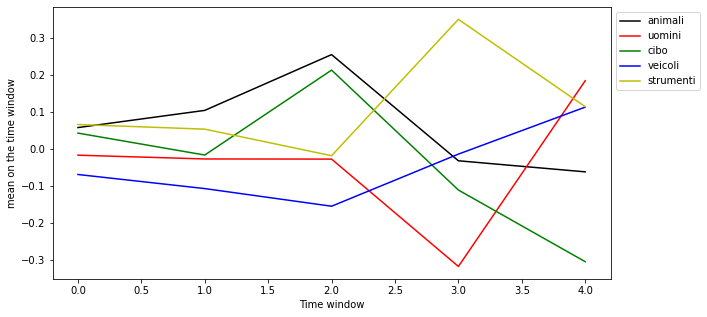

In [37]:
#Indici che definiscono gli intervalli 
Sid=[24,35,48,71,95,106]

#Ottengo gli intervalli dai vettori tempo e categorie animali e uomini 
S_x=[np.take(x,np.arange(Sid[i],Sid[i+1]))for  i in range(len(Sid)-1)]
S_a_m=[np.take(animali,np.arange(Sid[i],Sid[i+1]))for  i in range(len(Sid)-1)]
S_u_m=[np.take(uomini,np.arange(Sid[i],Sid[i+1]))for  i in range(len(Sid)-1)]
S_c_m=[np.take(cibo,np.arange(Sid[i],Sid[i+1]))for  i in range(len(Sid)-1)]
S_v_m=[np.take(veicoli,np.arange(Sid[i],Sid[i+1]))for  i in range(len(Sid)-1)]
S_s_m=[np.take(strumenti,np.arange(Sid[i],Sid[i+1]))for  i in range(len(Sid)-1)]

#ottengo i valori medi per ogni intervallo dei vettori delle categorie animali e uomini 
S_mean_a_m=[np.mean(i) for  i in S_a_m]
S_mean_u_m=[np.mean(i) for  i in S_u_m]
S_mean_c_m=[np.mean(i) for  i in S_c_m]
S_mean_v_m=[np.mean(i) for  i in S_v_m]
S_mean_s_m=[np.mean(i) for  i in S_s_m]

#plotto i risutati 
plt.figure(figsize = (10, 5))
plt.plot(range(5),S_mean_a_m,color='k', label = 'animali')
plt.plot(range(5),S_mean_u_m,color='r',label = 'uomini')
plt.plot(range(5),S_mean_c_m,color='g', label = 'cibo')
plt.plot(range(5),S_mean_v_m,color='b',label = 'veicoli')
plt.plot(range(5),S_mean_s_m,color='y', label = 'strumenti')

plt.xlabel('Time window')
plt.ylabel('mean on the time window')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

In [38]:
#eseguo la segmentazione per tutti gli nimali e per tutti gli uomini 
S_a=[[np.take(j,np.arange(Sid[i],Sid[i+1]))for  i in range(len(Sid)-1)]for  j in vett_animali]
S_u=[[np.take(j,np.arange(Sid[i],Sid[i+1]))for  i in range(len(Sid)-1)] for  j in vett_uomini]
S_c=[[np.take(j,np.arange(Sid[i],Sid[i+1]))for  i in range(len(Sid)-1)]for  j in vett_cibo]
S_v=[[np.take(j,np.arange(Sid[i],Sid[i+1]))for  i in range(len(Sid)-1)] for  j in vett_veicoli]
S_s=[[np.take(j,np.arange(Sid[i],Sid[i+1]))for  i in range(len(Sid)-1)]for  j in vett_strumenti]

#eseguo la media per tutti
S_mean_a=[[np.mean(i) for  i in S_a[j]]for j in range(len(vett_animali))]
S_mean_u=[[np.mean(i) for  i in S_u[j]]for j in range(len(vett_uomini))]
S_mean_c=[[np.mean(i) for  i in S_c[j]]for j in range(len(vett_cibo))]
S_mean_v=[[np.mean(i) for  i in S_v[j]]for j in range(len(vett_veicoli))]
S_mean_s=[[np.mean(i) for  i in S_s[j]]for j in range(len(vett_strumenti))]

In [39]:
#Lo salvo come pandas 
df1 = pd.DataFrame (S_mean_a, columns = ['s1 [0-45]','s2 [45-95]','s3 [95-190]','s4 [190-285]','s5 [285-3350]'])
df2 = pd.DataFrame (S_mean_u, columns = ['s1 [0-45]','s2 [45-95]','s3 [95-190]','s4 [190-285]','s5 [285-3350]'])
df3 = pd.DataFrame (S_mean_c, columns = ['s1 [0-45]','s2 [45-95]','s3 [95-190]','s4 [190-285]','s5 [285-3350]'])
df4 = pd.DataFrame (S_mean_v, columns = ['s1 [0-45]','s2 [45-95]','s3 [95-190]','s4 [190-285]','s5 [285-3350]'])
df5 = pd.DataFrame (S_mean_s, columns = ['s1 [0-45]','s2 [45-95]','s3 [95-190]','s4 [190-285]','s5 [285-3350]'])
frames_interval = [df1, df2, df4]

df =pd.concat(frames_interval)

In [40]:
#inserisco la colonna riguardante la categoria di immagine
a_type=np.zeros(36, dtype=int)
b_type=np.ones(16, dtype=int)
c_type=np.full((1,26),2)
d_type=np.full((1,26),3)
e_type=np.full((1,26),4)
types=np.concatenate((a_type,b_type,c_type[0]))
types

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
df.insert(0, "Type", types ,True)
labels=np.array(df['Type'])
features=df.drop('Type', axis = 1)

In [42]:
def SVM_traintest(labels, features):
    features_train, features_test, labels_train, labels_test = train_test_split(features,labels, test_size=0.3)
    sc_X = StandardScaler()
    features_train = sc_X.fit_transform(features_train)
    features_test = sc_X.fit_transform(features_test)
    clf=OneVsRestClassifier(svm.SVC(kernel='rbf'))
    clf.fit(features_train, labels_train)
    labels_pred=clf.predict(features_test)
    print('ACCURATEZZA') 
    print(accuracy_score(labels_test, labels_pred))
    cm = confusion_matrix(labels_test, labels_pred, labels=clf.classes_)
    sns.heatmap(cm, annot=True)
    plt.savefig('confusion.png')
    print(classification_report(labels_test, labels_pred))
    return accuracy_score(labels_test, labels_pred)  

In [43]:
def SVM_cv(labels,features):
    m = OneVsRestClassifier(svm.SVC(kernel='rbf', C=1))
    splitter=KFold(n_splits=10, shuffle=True)
    scores=[]
    scores.append(cross_val_score(m, features, labels, cv=splitter))
    scores=np.array(scores)
    score_cv=scores.mean()
    return score_cv

ACCURATEZZA
0.625
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.00      0.00      0.00         3
           2       0.78      0.70      0.74        10

    accuracy                           0.62        24
   macro avg       0.48      0.48      0.48        24
weighted avg       0.63      0.62      0.63        24



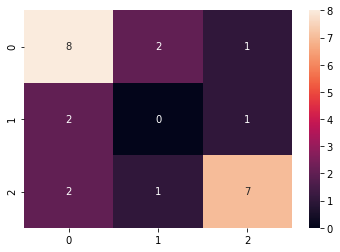

In [48]:
score_traintest = SVM_traintest(labels, features)

In [50]:
score_cv=SVM_cv(labels, features)
score_cv

0.5535714285714286

In [92]:
combinazioni=['Animali_Uomini', 'Animali_Cibo', 'Animali_Veicoli', 'Animali_Strumenti', 'Uomini_Cibo', 'Uomini_Veicoli',
             'Uomini_Strumenti', 'Cibo_Veicoli', 'Cibo_Strumenti', 'Veicoli_Strumenti']
print(len(combinazioni))

10


In [49]:
#applico PCA
from sklearn.preprocessing import StandardScaler
df=[StandardScaler().fit_transform(i) for i in features] 


from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents =[ pca.fit_transform(i) for i in df]
principalDf = [pd.DataFrame(data = i, columns = ['pc 1','pc 2','pc 3','pc 4','pc 5','pc 6','pc 7','pc 8']) for i in principalComponents]


principalDf[2].head()

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8
0,-2.085674,-0.152224,2.900264,0.082184,-1.587556,0.378435,-0.014110,-0.143770
1,-2.539577,1.281260,0.433934,0.089344,-0.135249,0.840309,0.225970,0.206769
2,0.419716,0.031635,2.176612,-1.004463,0.179989,2.278981,-1.115034,0.225369
3,-2.169951,1.063570,-0.065805,1.602497,0.051881,-0.001680,-0.353581,0.266419
4,0.722199,1.035453,-0.366320,-0.392585,0.370674,-0.221815,-0.202423,0.100029


In [51]:
#CWT
import pywt

vett_animali_c=[np.delete(i,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])for i in vett_animali ]
vett_uomini_c =[np.delete(i,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)]) for i in vett_uomini]
vett_cibo_c=[np.delete(i,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])for i in vett_cibo ]
vett_veicoli_c =[np.delete(i,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)]) for i in vett_veicoli]
vett_strumenti_c=[np.delete(i,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])for i in vett_strumenti ]

#calcolo le CWT per ogni categoria 
cwt_animali_vector=[pywt.cwt(i,np.arange(1,101),'morl')for  i in vett_animali_c]
cwt_uomini_vector =[pywt.cwt(i,np.arange(1,101),'morl')for  i in vett_uomini_c]
cwt_cibo_vector=[pywt.cwt(i,np.arange(1,101),'morl')for  i in vett_cibo_c]
cwt_veicoli_vector =[pywt.cwt(i,np.arange(1,101),'morl')for  i in vett_veicoli_c]
cwt_strumenti_vector=[pywt.cwt(i,np.arange(1,101),'morl')for  i in vett_strumenti_c]

In [52]:
#eseguo una formattazione dei coefficienti wavelet
features_a=[cwt_animali_vector[i][0].flatten() for  i in range(len(vett_uomini_c))]
features_u=[cwt_uomini_vector[i][0].flatten()  for  i in range(len(vett_uomini_c))]
features_c=[cwt_cibo_vector[i][0].flatten() for  i in range(len(vett_uomini_c))]
features_v=[cwt_veicoli_vector[i][0].flatten()  for  i in range(len(vett_uomini_c))]
features_s=[cwt_strumenti_vector[i][0].flatten() for  i in range(len(vett_uomini_c))]

In [53]:
#Lo salvo come pandas 
df_1 = pd.DataFrame (features_a)
df_2 = pd.DataFrame (features_u)
df_3 = pd.DataFrame (features_c)
df_4 = pd.DataFrame (features_v)
df_5 = pd.DataFrame (features_s)

In [54]:
#PCA a 8 componenti
frames_CWT = [[df_1, df_2],[df_1, df_3],[df_1, df_4],[df_1, df_5],[df_2, df_3],[df_2, df_4],[df_2, df_5],[df_3, df_4],
              [df_3, df_5],[df_4, df_5]]

df_CWT8 =[pd.concat(i) for i in frames_CWT]
df_CWT8=[StandardScaler().fit_transform(i) for i in df_CWT8] 
pca = PCA(n_components=8)
principalComponentsCWT8 =[ pca.fit_transform(i) for i in df_CWT8]
principalDfCWT8 = [pd.DataFrame(data = i, columns = ['pc 1','pc 2','pc 3','pc 4','pc 5','pc 6','pc 7','pc 8']) for i in principalComponentsCWT8]

In [55]:
#PCA a 2 componenti
frames_CWT = [[df_1, df_2],[df_1, df_3],[df_1, df_4],[df_1, df_5],[df_2, df_3],[df_2, df_4],[df_2, df_5],[df_3, df_4],
              [df_3, df_5],[df_4, df_5]]

df_CWT2 =[pd.concat(i) for i in frames_CWT]
df_CWT2 =[StandardScaler().fit_transform(i) for i in df_CWT2] 
pca = PCA(n_components=2)
principalComponentsCWT2 =[ pca.fit_transform(i) for i in df_CWT2]
principalDfCWT2 = [pd.DataFrame(data = i, columns = ['pc 1','pc 2']) for i in principalComponentsCWT2]

In [56]:
#inserisco la colonna riguardante la categoria
k=0
h=0
for i in range(len(types)):
    k=i
    for j in range (len(types)-i-1):
        k=k+1
        principalDfCWT8[h].insert(0, "Type", np.concatenate((types[i],types[k])) ,True)
        h=h+1

In [57]:
#inserisco la colonna riguardante la categoria
k=0
h=0
for i in range(len(types)):
    k=i
    for j in range (len(types)-i-1):
        k=k+1
        principalDfCWT2[h].insert(0, "Type", np.concatenate((types[i],types[k])) ,True)
        h=h+1

In [58]:
#estraggo i dati da dare in ingresso all SVM
label_CWT8=[np.array(i['Type']) for i in principalDfCWT8]
features_CWT8=[ i.drop('Type', axis = 1) for i in principalDfCWT8]
label_CWT2=[np.array(i['Type']) for i in principalDfCWT2]
features_CWT2=[ i.drop('Type', axis = 1) for i in principalDfCWT2]

In [29]:
#concateno i dati interval e CWT
label_interval_cwt=[np.concatenate([label[i],label_CWT8[i]]) for i in range(len(label))]
features_interval_cwt=[np.concatenate([features[i],features_CWT8[i]]) for i in range(len(features))]

In [81]:
#creazione dataset Interval no PCA
frames_interval = [df1, df2, df5]
df = pd.concat(frames_interval)
types=np.concatenate((a_type, b_type, e_type), axis=None)
df.insert(0, "Type", types ,True)
label=np.array(df['Type']) 
features=df.drop('Type', axis = 1)

#creazione dataset CWT PCA 8
frames_interval = [df_1, df_2, df_5]
df_CWT = pd.concat(frames_interval)
pca = PCA(n_components=8)
PCCWT8 = pca.fit_transform(df_CWT)
PDFCWT8 = pd.DataFrame(data = PCCWT8, columns = ['pc 1','pc 2','pc 3','pc 4','pc 5','pc 6','pc 7','pc 8'])
PDFCWT8.insert(0, "Type", types ,True)
label_CWT8=np.array(PDFCWT8['Type']) 
features_CWT8=PDFCWT8.drop('Type', axis = 1)


In [82]:
from sklearn.model_selection import train_test_split

scores=[]
scores.append(cross_val_score(m, features_CWT8, label_CWT8, cv=splitter))
scores

scores=np.array(scores)
scores.mean()
#m.fit(df)
#m.fit_transform(y)
#m.score(X, y)
#df

0.7347222222222223